In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import statistics as st

import pandas as pd

%matplotlib notebook

<IPython.core.display.Javascript object>


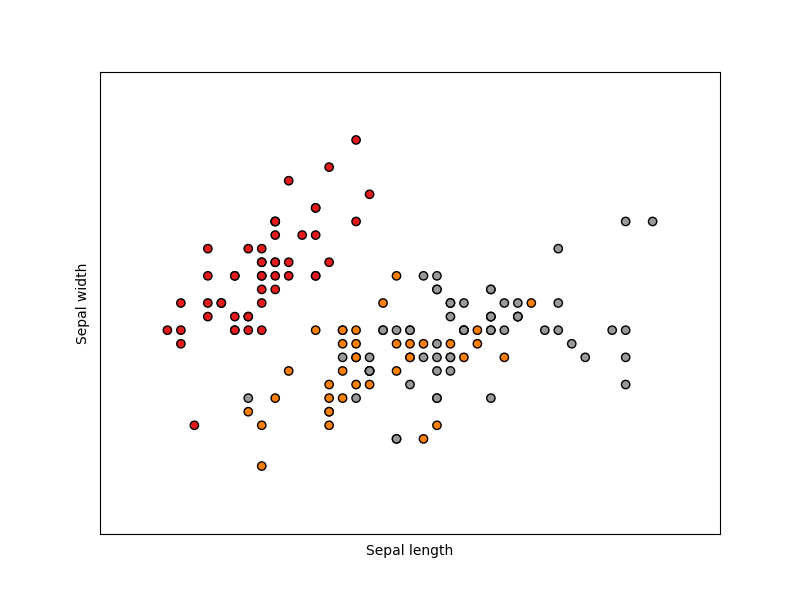

([], [])

In [3]:
# https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82

# import data
iris = load_iris()

#print(iris.DESCR)

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

<IPython.core.display.Javascript object>


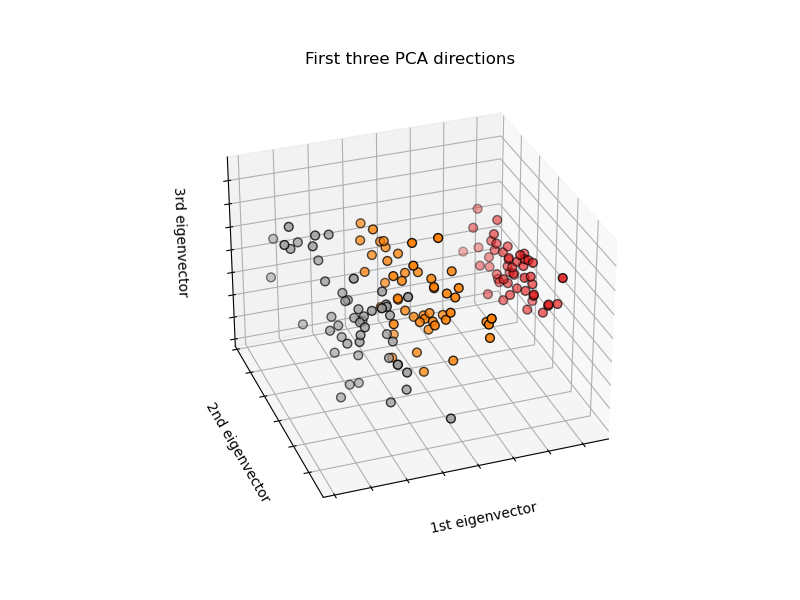

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

In [4]:
# To get a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [5]:
data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#put target data into data frame
target = pd.DataFrame(iris.target)
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()

#0 is Iris Setosa
#1 is Iris Versicolour
#2 is Iris Virginica

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
#axis = 1 tells the data frame to add the target data frame as another column of the data data frame, 
#axis = 0 would add the values as another row on the bottom
df = pd.concat([data, target], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
#there's a bug here

# import seaborn as sns
# sns.heatmap(df.corr(), annot = True);
#annot = True adds the numbers onto the squares

<IPython.core.display.Javascript object>


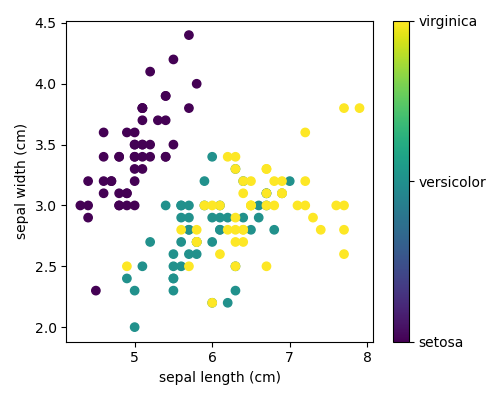

In [21]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target,label=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


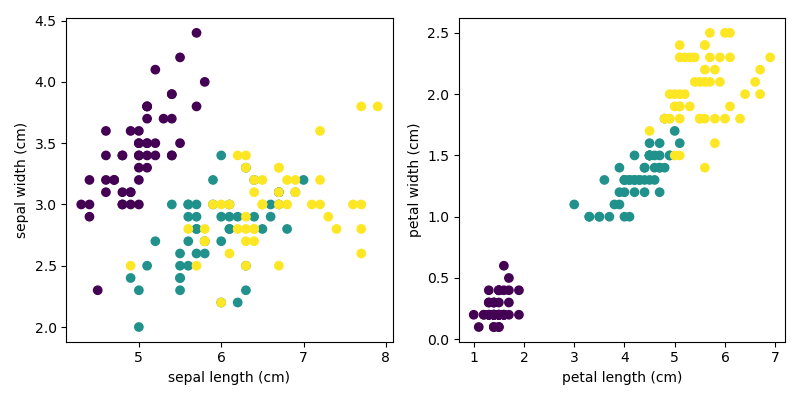

In [16]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
x2_index = 2
y2_index = 3

fig,ax = plt.subplots(1,2,figsize=(8,4))
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


ax[0].scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
ax[0].set_xlabel(iris.feature_names[x_index])
ax[0].set_ylabel(iris.feature_names[y_index])

ax[1].scatter(iris.data[:, x2_index], iris.data[:, y2_index], c=iris.target)
ax[1].set_xlabel(iris.feature_names[x2_index])
ax[1].set_ylabel(iris.feature_names[y2_index])



#fig.colorbar(iris.data[:,x_index], ticks=[0, 1, 2], format=formatter, location='right')
fig.tight_layout()

In [ ]:
# create a fuzzy inference set

# 1. data comes from iris dataset ^
# 2. fuzzification: convert data to fuzzy sets via membership functions

setosa = fuzz.gauss2mf(temp, mu_0, sig_0, mu_1, sig_1) #make sure to handcraft this later
# or
setosa = fuzz.trapmf(x, [a, b, c, d])
versicolor =
virginica =

In [ ]:
# 3. use fuzzy sets and rules to make predictions. i.e. implement mamdani 
# rules will be based on FEATURES:
#        sepal length, sepal width
#        petal length, petal width

# aggregation method: max

In [ ]:
# 4. defuzzification

# centroid

In [ ]:
# 5. results: make the classification